In [35]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/FOUNDATION/train.csv')


In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [38]:
Y_train

array([6, 1, 8, ..., 3, 2, 7])

In [39]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2
def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


In [40]:
def compute_loss(A2, Y):
    m = Y.size
    one_hot_Y = one_hot(Y)
    log_probs = -np.log(A2[one_hot_Y.astype(bool)])
    loss = np.sum(log_probs) / m
    return loss

In [41]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    losses = []
    accuracies = []
    for i in range(iterations):
        # Forward propagation
        Z1, A1, Z2, A2  = forward_prop(W1, b1, W2, b2, X)

        # Compute loss
        loss = compute_loss(A2, Y)
        losses.append(loss)

        # Compute accuracy
        predictions = get_predictions(A2)
        accuracy = get_accuracy(predictions, Y)
        accuracies.append(accuracy)

        # Backward propagation
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2,W1, W2, X, Y)

        # Update parameters
        W1, b1, W2, b2 = update_params(W1,b1, W2,b2, dW1, db1, dW2, db2, alpha)

        # Print progress every 10 iterations
        if i % 10 == 0:
            print(f"Iteration: {i}, Loss: {loss}, Accuracy: {accuracy}")

    return W1, b1, W2, b2, losses, accuracies


In [42]:

W1, b1, W2, b2, losses_original, accuracies_original = gradient_descent(X_train, Y_train, 0.10, 500)

[1 6 7 ... 0 7 4] [6 1 8 ... 3 2 7]
Iteration: 0, Loss: 3.0471440095934037, Accuracy: 0.10968292682926829
[1 6 7 ... 0 7 4] [6 1 8 ... 3 2 7]
[1 6 0 ... 0 7 4] [6 1 8 ... 3 2 7]
[1 6 0 ... 0 0 4] [6 1 8 ... 3 2 7]
[1 6 0 ... 0 0 4] [6 1 8 ... 3 2 7]
[1 6 0 ... 0 0 4] [6 1 8 ... 3 2 7]
[1 6 0 ... 0 0 4] [6 1 8 ... 3 2 7]
[1 6 0 ... 0 0 4] [6 1 8 ... 3 2 7]
[1 6 0 ... 0 0 4] [6 1 8 ... 3 2 7]
[1 6 0 ... 0 0 4] [6 1 8 ... 3 2 7]
[1 6 0 ... 0 0 4] [6 1 8 ... 3 2 7]
Iteration: 10, Loss: 2.2298137704602747, Accuracy: 0.21070731707317072
[1 6 0 ... 0 0 4] [6 1 8 ... 3 2 7]
[1 6 0 ... 0 0 4] [6 1 8 ... 3 2 7]
[1 6 0 ... 0 0 4] [6 1 8 ... 3 2 7]
[1 6 0 ... 0 0 4] [6 1 8 ... 3 2 7]
[1 6 0 ... 0 0 4] [6 1 8 ... 3 2 7]
[1 6 0 ... 0 0 4] [6 1 8 ... 3 2 7]
[1 6 0 ... 0 0 4] [6 1 8 ... 3 2 7]
[1 6 0 ... 0 0 4] [6 1 8 ... 3 2 7]
[1 6 0 ... 0 0 4] [6 1 8 ... 3 2 7]
[1 6 0 ... 0 0 9] [6 1 8 ... 3 2 7]
Iteration: 20, Loss: 2.0195054512133495, Accuracy: 0.2839024390243902
[1 6 0 ... 0 0 9] [6 1 8 ... 3 2 

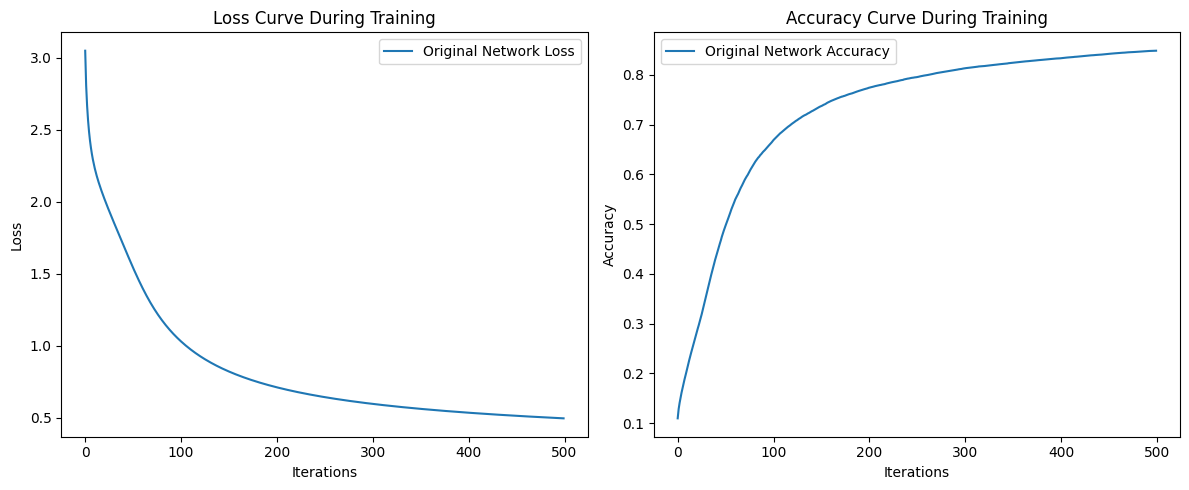

In [43]:
# Loss curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(losses_original, label="Original Network Loss")
plt.title("Loss Curve During Training")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(accuracies_original, label="Original Network Accuracy")
plt.title("Accuracy Curve During Training")
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

In [44]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()


Prediction:  [6]
Label:  6


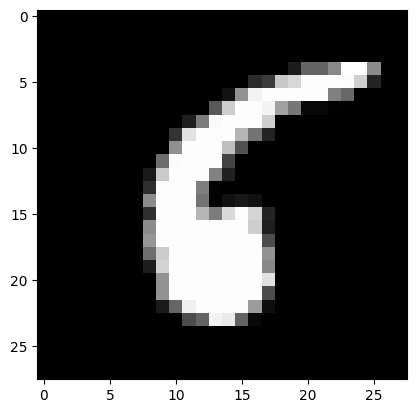

Prediction:  [1]
Label:  1


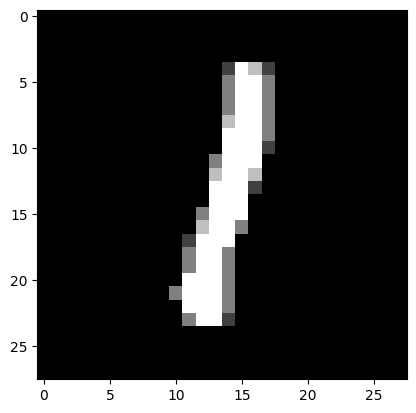

Prediction:  [8]
Label:  8


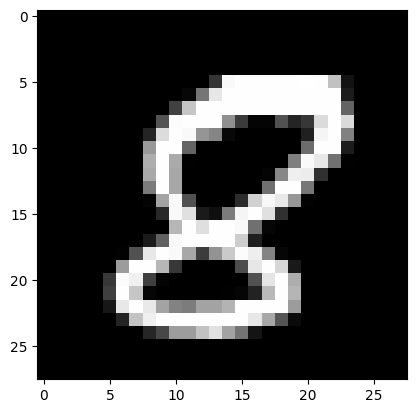

Prediction:  [6]
Label:  6


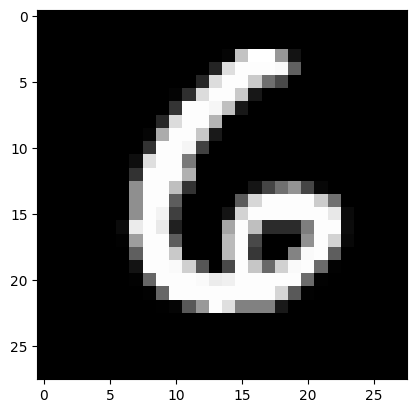

In [45]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)


In [46]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)


[9 1 7 7 1 1 5 6 4 3 1 7 9 1 3 2 7 3 3 8 4 1 8 1 3 8 2 7 9 9 1 5 3 7 1 1 8
 8 0 5 8 3 0 3 5 8 3 8 6 4 4 6 2 1 9 5 8 4 4 4 9 1 2 4 6 2 7 8 5 6 7 1 5 9
 7 1 0 9 9 4 8 2 8 2 1 1 7 4 5 6 4 4 6 1 0 1 1 0 5 4 0 1 3 0 4 6 1 4 0 1 1
 3 1 0 4 5 9 8 9 9 3 2 3 9 9 2 0 9 4 8 0 3 0 8 2 0 9 3 7 3 9 6 5 3 6 6 1 2
 1 2 0 5 9 2 7 5 8 1 0 4 7 3 9 1 1 2 9 0 4 9 1 7 8 0 1 4 9 8 9 2 3 4 6 9 7
 6 0 7 9 5 3 9 2 3 0 2 0 3 3 2 2 0 1 6 3 8 6 4 3 5 8 3 0 2 0 0 2 1 1 4 1 1
 0 6 9 7 4 2 4 8 3 6 7 7 4 1 4 7 7 9 5 0 1 0 9 7 1 3 1 3 8 0 4 3 2 4 8 6 1
 5 2 5 3 9 1 4 9 6 4 0 5 2 6 1 0 7 9 9 8 0 1 6 3 6 7 2 4 6 6 3 7 1 9 7 4 8
 6 1 9 7 3 4 3 1 3 1 5 6 9 0 1 2 8 0 5 5 3 6 8 7 9 6 7 4 9 5 7 2 2 6 2 4 3
 4 9 7 7 0 9 2 2 2 1 9 3 5 5 1 0 8 0 0 4 6 6 3 3 5 2 9 0 0 0 2 9 1 5 0 0 3
 5 6 1 3 7 2 9 0 2 3 1 5 1 5 5 3 6 3 0 4 2 8 2 6 5 7 8 1 5 9 9 4 1 3 0 3 4
 1 0 2 5 5 3 3 1 9 6 1 1 4 7 6 1 8 8 8 0 5 4 0 4 2 9 0 2 7 9 3 2 1 1 6 1 6
 5 3 4 0 2 1 2 5 3 9 3 5 8 8 3 3 4 7 4 0 7 4 7 5 4 6 6 4 2 1 9 3 1 0 4 2 6
 5 4 3 1 5 4 7 2 6 8 3 1 

0.846